# Problem (2.4)

## Problem statement

Calculate $\langle x \rangle$, $\langle x^2 \rangle$, $\langle p \rangle$, $\langle p^2 \rangle$, $\sigma_x$, and $\sigma_p$, for the $n$th stationary state of the infinite square well. Check the uncertainty principle is satisfied. Which state comes closest to the uncertainty limit?

----

## Solution

The $n$th stationary state is given by equation 2.35

$$ \Psi_n(x, t) = \sqrt{\frac{2}{a}} \sin (\frac{n\pi}{a}x) e^(-iE_nt/\hbar) $$

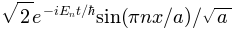

In [1]:
import sympy as sp
from sympy.physics.quantum.constants import hbar
sp.init_printing()

a, n, x, E, t, m = sp.symbols('a n x E_n t m', real=True, positive=True)
n = sp.symbols('n', integer=True)

psi_n = sp.sqrt(2/a)*sp.sin(n*sp.pi*x/a)*sp.exp(-sp.I*E*t/hbar)
psi_n

To get $\langle x \rangle$ and $\langle x^2 \rangle$ we use the following equation:

$$ \langle x \rangle = \int_{0}^{a}\Psi^* x \Psi dx $$

with the appropriate operator sandwiched between $\psi^*$ and $\psi$

In [2]:
#conjugate psi_n
psisq = sp.conjugate(psi_n)*psi_n
expectx = sp.integrate(x*psisq, (x, 0, a))
sp.simplify(expectx)

⎧0  for n = 0
⎪            
⎨a           
⎪─  otherwise
⎩2           

here is $\langle x \rangle$

In [3]:
expectx2 = sp.integrate(x**2*psisq, (x, 0, a))
sp.simplify(expectx2)

⎧     0        for n = 0
⎪                       
⎪ 2       2             
⎨a       a              
⎪── - ───────  otherwise
⎪3       2  2           
⎩     2⋅π ⋅n            

here is $\langle x^2 \rangle$

To get $\langle p \rangle$, we take the time derivative of $\langle x \rangle$ and multiply by mass, $ m \frac{d\langle x \rangle}{dt}$

In [4]:
expectp = m*sp.diff(expectx, t)
expectp

Here is $\langle p \rangle$ (obviously)

For $\langle p^2 \rangle$, we sandwich the squared momentum operator, $-\hbar^2\frac{\partial^2}{\partial x^2}$ between $\Psi^*$ and $\Psi$ and integrate

In [5]:
expectp2 = -(hbar**2)*sp.integrate(sp.conjugate(psi_n)*sp.diff(psi_n, x, 2), (x, 0, a))
sp.simplify(expectp2)

⎧              π⋅n    
⎪   0      for ─── = 0
⎪               a     
⎪                     
⎨ 2  2  2             
⎪ℏ ⋅π ⋅n              
⎪────────   otherwise 
⎪    2                
⎩   a                 

Here is $\langle p^2 \rangle$

Now 

$$ \sigma_x = \sqrt{\langle x^2 \rangle - \langle x \rangle ^2 } $$

In [6]:
sigmax = sp.sqrt(expectx2 - (expectx**2))
sp.simplify(sigmax)

⎧          0            for n = 0
⎪                                
⎪          ___________           
⎪         ╱       6              
⎨√3⋅a⋅   ╱  1 - ─────            
⎪       ╱        2  2            
⎪     ╲╱        π ⋅n             
⎪─────────────────────  otherwise
⎩          6                     

In [7]:
#repeat the same thing for p
sigmap = sp.sqrt(expectp2 - (expectp)**2)
sp.simplify(sigmap)

⎧             π⋅n    
⎪   0     for ─── = 0
⎪              a     
⎨                    
⎪ℏ⋅π⋅│n│             
⎪───────   otherwise 
⎩   a                

check the uncertainty principle

$$\sigma_x\sigma_p \geq \frac{\hbar}{2}$$

In [8]:
sigmaprod = sigmax * sigmap
sp.simplify(sigmaprod)

⎧                    0                      for n = 0
⎪                                                    
⎪⎧                                 π⋅n               
⎪⎪             0               for ─── = 0           
⎪⎪                                  a                
⎪⎪                                                   
⎨⎪            ___________                            
⎪⎨           ╱       6                      otherwise
⎪⎪√3⋅ℏ⋅π⋅   ╱  1 - ───── ⋅│n│                        
⎪⎪         ╱        2  2                             
⎪⎪       ╲╱        π ⋅n                              
⎪⎪───────────────────────────   otherwise            
⎩⎩             6                                     

In the above expression we can see that the product $\sigma_x\sigma_p$ grows as n gets bigger. So the smallest value will be when $n$ = 1. So the ground state comes closest to the limit. 

----

## Portfolio references
* Problem 1.3, 1.5, 1.9
## Index terms
* uncertainty principle
* Schrodinger equation
* expectation value
* standard deviation
* momentum operator
## Book references
* eq 1.33 and 1.35 on pages 16 and 17, equation 2.35 on page 34
## External references